Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Haitong Lin"
COLLABORATORS = ""

---

Weekly mini-project 5, STATS102 Fall2019 Session 2, Duke Kunshan University, Due at Dec 2th 12:00pm Shanghai time
![](dku.jpg)
For this problem set, we'll be using the Jupyter notebook:
![](jupyter.png) 

# Problem 1

Consider n people who are attending a class and n is smaller than 200. We assume that every person has an equal probability of being born on any day during the year, independently of everyone else, and ignore the additional complication presented by leap years (i.e., nobody is born on February 29, we have 365 days for one year). 

What is the probability that for all n people each person has a distinct birthday? Please calcuate the P(n) and plot the P(n) against n to visualize the trend.

In [1]:
%matplotlib inline
import numpy as np
from math import factorial
import matplotlib.pyplot as plt

def myfunction1():
    # YOUR CODE HERE
    n=np.random.randint(1,200)
    p=1
    nlist=[]
    plist=[]
    for n in range(2,200):
        p=((366-n)/365)*p       
        nlist.append(n)
        plist.append(p)
        
    plt.plot(nlist,plist)
    plt.xlim(1,200)
    plt.xlabel('n')
    plt.ylim(-0.1,1.1)
    plt.ylabel('P(n)')
    plt.title('probability that for all n people each person has a distinct birthday')
    plt.show()
    return p

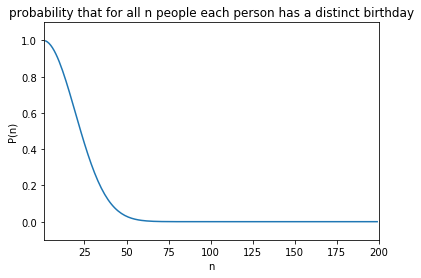

3.540336230356526e-30

In [2]:
myfunction1()

You can write your explanation below:

YOUR ANSWER HERE

The probability of an event is given by

P=num of restricted combinations/num of unrestricted combinations

In this problem, 

num of restricted combinations=P(365,n)

num of unrestricted combinations=365^n

Therefore,

P(n)=P(365,n)/365^n

Or as the method used in the code above:

when n=1, p=1; when n=2,p=p*(364/365).......so when n=n, p=p=((366-n)/365)*p

The calculation result is in above

# Problem 2

Draw the top 7 cards from a well-shuffled standard 52-card deck. Find the probability that the 7 cards include exactly 3 Kings.

Pleaes solve it mathmatically and also use comptuer simulation to prove your solution.

In [58]:
from math import factorial
from scipy.special import comb

def myfunction2_1():
    '''theoretical answer, please illustrate how you calculate the answer'''
    # YOUR CODE HERE
    return (comb(48,4)*comb(4,3))/comb(52,7)

myfunction2_1()

0.005817711700064641

You can write your explanation below:

YOUR ANSWER HERE

The probability of an event is given by

P=num of restricted combinations/num of unrestricted combinations

In this problem, 

num of restricted combinations=C(4,3)*C(48,4)=778320 (indicating that 3 cards are from the kings and the 4 others are from the rest)

num of unrestricted combinations=C(52,7)=133784560

Therefore,

P=(C(4,3)*C(48,4))/C(52,7)=0.0058

In [3]:
import numpy as np

def myfunction2_2():
    '''simulation answer, please write codes to simulate the random experiments and calculate the answer'''
    # YOUR CODE HERE
    count=0
    N=100000
    kings=[1,2,3,4]
    
    for t in range(N):
        k=0
        cards=np.arange(1,53)
        np.random.shuffle(cards)
        cards=cards[:7]
        for i in range(7):
            if cards[i] in kings:
                k+=1
        if k==3:
            count+=1
    return count/N

In [4]:
myfunction2_2()

0.00593

In [ ]:
"""Check functions return the correct answer."""

# Problem 3

Using simulation to estimate the area under the graph of $y = 1/(x + 1)$ in the unit square ($x \in [0,1],y \in [0,1]$) in the same way as in Fig 2.3 (textbook page 44). 

Calculate the true value of this area and use your simulation results to estimate the value of log 2. How accurate is your estimate?

In [251]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def myfunction3():
    '''simulation answer, please write codes to simulate the random experiments, plot the figure and return the estimate of the area'''
    # YOUR CODE HERE
    n=2000
    count=0
    area=1
    N=np.arange(0,1.5,0.1)
    plt.plot(N,1/(N+1))
    plt.plot([0,1,1,0,0],[1,1,0,0,1])
    a=np.arange(0,1.1,0.1)
    plt.fill_between(a,1/(a+1))
    for i in range(n):
        x=np.random.uniform(0,1)
        y=np.random.uniform(0,1)
        plt.scatter(x,y,s=3,c='black',alpha=0.3)
        if y<=1/(x+1):
            count+=1
    
    plt.show()
    return area*(count/n)

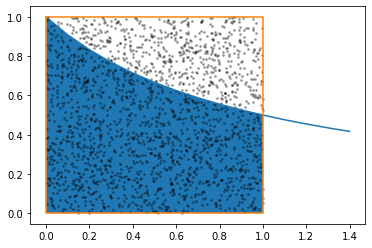

0.697

In [252]:
myfunction3()

The true value of this area:

YOUR ANSWER HERE

The true value of this area is the integration of y=1/(1+x) from 0 to 1, which is ln2-ln1=ln2=0.69

In [112]:
np.log(2)

0.6931471805599453

How accurate is your estimate?

YOUR ANSWER HERE

i think my esitmation is fairly accurate because the error is smaller than 0.01. I believe that my estimation will be even more accurate if we scale up the number of trials (but I didn't do it because it would take took much time to load the graph).

# Problem 4

Simulate the Monty Hall problem (textbook page 136 example 4.6). Carefully state any assumptions that you have made when writing the program, and use annotation to explain each line of your code.

In [15]:
import numpy as np
def myfunction4():
    # YOUR CODE HERE
    N=10000                  #set the number of trials to be 10000
    n=0                      #set n to be the number of times the contestant wins if switched
    c=0                      #set c to be the number of times the contestant wins if not switched
    for i in range(N):
        l=[0,0,1]            #0 means goal and 1 means the care
        np.random.shuffle(l) #randomly get a result, and the position of the list represents the order of doors
        a=l[0]               #a means the result that the contestant got (before switching)
        rest=l[1:]           #rest means the results left
        rest.remove(0)       #because monty opens a door with goat, so we remove a 0 from rest
        if 1 in rest:        #now the rest only contains one element, which will be the result if switched
            n+=1             #count the times if the car is the result
        else:
            c+=1             #count the times if it's not the car (means that winning when not switching)
    return [n/N,c/N]         #the first result is the probability of winning when switching,
                             #the second one is the probability of winning when not switching
myfunction4() 

[0.6646, 0.3354]

You can write your explanation below:

![](P4.jpg)

YOUR ANSWER HERE

The monty hall problem is a conditional probability problem, and according to the figure above

If the contestant don't switch his/her option for doors, the path possibility is:

P1=(1/3)* (1/3) * (1/2)=1/18

If the contestant change his/her opition, the path possibility is:

P2=(1/3)* (1/3)* 1=1/9

Since in our situation we only have these two paths, which means P1+P2=1

So P1=1/3, P2=2/3

The simulation results is above and the explanation of my code is in the annotation above

# Problem 5

A train bridge is constructed across a wide river. Trains arrive at the bridge according to a Poisson process of rate λ =3 per day.

### Problem 5.1

If a train arrives on day 0, find the probability that there will be no trains on days 1, 2 and 3.

In [285]:
import numpy as np
from math import factorial

def myfunction5_1():
    '''theoretical answer, please illustrate how you calculate the answer'''
    # YOUR CODE HERE
    k=0
    P_day0=(3**k/factorial(k))*np.exp(-3)
    P1=(P_day)**3
    return P1
myfunction5_1()

0.00012340980408667956

In [ ]:
"""Check that myfunction5_1 returns the correct answer."""

### Problem 5.2

Find the probability that no trains arrive in the first 2 days, but 4 trains arrive on the 4th day.

In [287]:
import numpy as np
from math import factorial

def myfunction5_2():
    '''theoretical answer, please illustrate how you calculate the answer'''
    # YOUR CODE HERE
    k1=0
    P_day0=(3**k1/factorial(k1))*np.exp(-3)
    k2=4
    P_day4=(3**k2/factorial(k2))*np.exp(-3)
    
    P2=P_day0**2*P_day4
    return P2
myfunction5_2()

0.0004165080887925435

In [ ]:
"""Check that myfunction5_2 returns the correct answer."""